<a href="https://colab.research.google.com/github/2303a52351-Saniya/Generative-AI-2025/blob/main/EXPLAINABLE_AI6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lung Cancer Risk Prediction using ML, DL & XAI

In [ ]:
!pip install -q imbalanced-learn xgboost shap lime joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install -q --upgrade tqdm

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Conv1D, Flatten, MaxPooling1D, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import PartialDependenceDisplay


import joblib
print('All packages imported.')

All packages imported.


In [ ]:
%matplotlib inline
sns.set(style='whitegrid')

In [ ]:
from google.colab import files
print('If you want to upload a local CSV, use the file upload dialog. Otherwise mount Google Drive (Option B).')

If you want to upload a local CSV, use the file upload dialog. Otherwise mount Google Drive (Option B).


In [16]:
from google.colab import files
import pandas as pd

# Upload the file (this will open a "choose file" dialog)
uploaded = files.upload()

# If you uploaded 'survey lung cancer.csv'
df = pd.read_csv("/content/survey lung cancer.csv")

# Check first rows
print(df.shape)
df.head()

Saving survey lung cancer.csv to survey lung cancer (1).csv
(309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


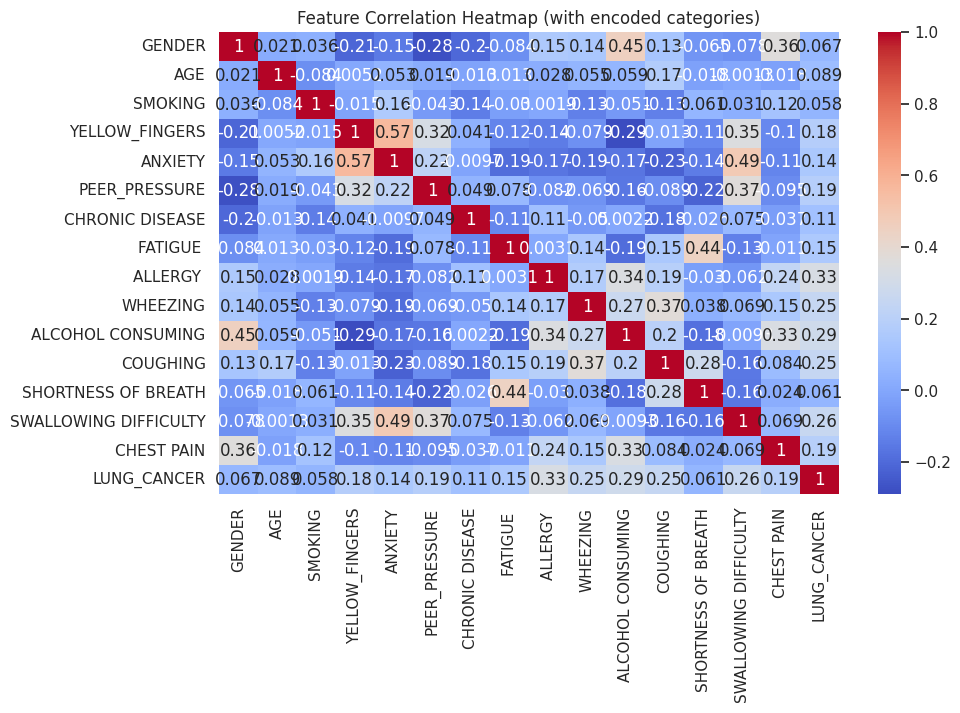

In [18]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap (with encoded categories)")
plt.show()


Shape: (309, 16)

Data Types:
 GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

Missing Values:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER         

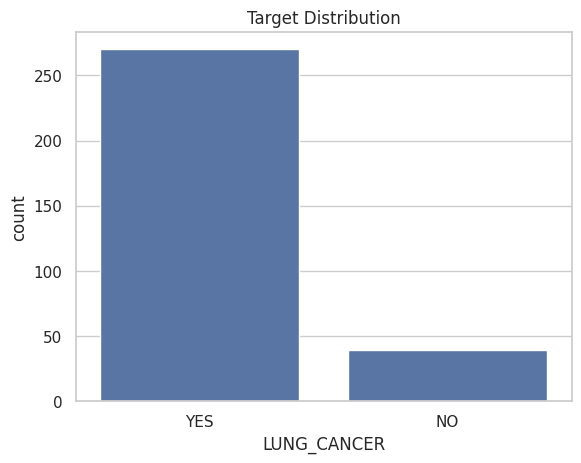

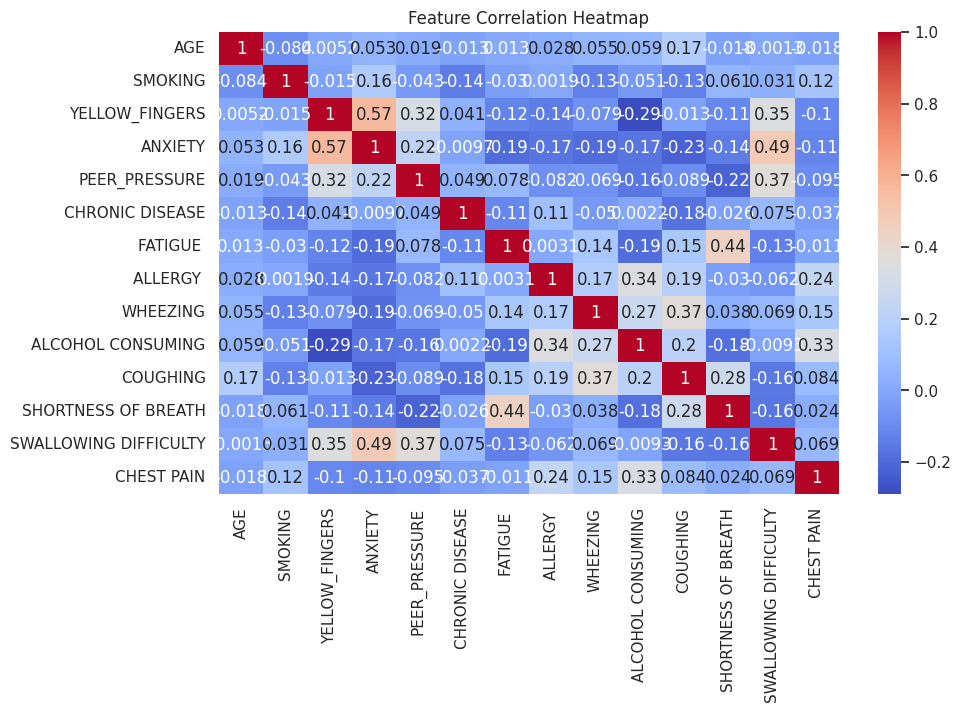

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Summary stats
print("\nSummary Statistics:\n", df.describe())

# Class distribution (assuming target column is 'LUNG_CANCER')
sns.countplot(x="LUNG_CANCER", data=df)
plt.title("Target Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
# Drop non-numeric columns before calculating correlation
numeric_df = df.drop(['GENDER', 'LUNG_CANCER'], axis=1)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
    if col != "LUNG_CANCER":
        df[col] = LabelEncoder().fit_transform(df[col])

# Encode target
df["LUNG_CANCER"] = LabelEncoder().fit_transform(df["LUNG_CANCER"])

# Features & Target
X = df.drop("LUNG_CANCER", axis=1)
y = df["LUNG_CANCER"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (247, 15) Test shape: (62, 15)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model,"predict_proba") else None

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_prob) if y_prob is not None else None
    ])

import pandas as pd
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1","ROC-AUC"])
print(results_df)


                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
0  Logistic Regression  0.903226   0.944444  0.944444  0.944444  0.946759
1        Decision Tree  0.919355   0.980392  0.925926  0.952381  0.900463
2        Random Forest  0.919355   0.962264  0.944444  0.953271  0.947917
3                  SVM  0.854839   0.894737  0.944444  0.918919  0.935185
4                  KNN  0.870968   0.910714  0.944444  0.927273  0.891204
5    Gradient Boosting  0.854839   0.924528  0.907407  0.915888  0.935185


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, GRU, Dropout, MaxPooling1D
from tensorflow.keras.utils import to_categorical

# Convert target to categorical (for DL if needed)
y_train_dl = to_categorical(y_train)
y_test_dl = to_categorical(y_test)

input_dim = X_train.shape[1]

# 1. MLP
mlp = Sequential([
    Dense(64, activation="relu", input_shape=(input_dim,)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])
mlp.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
mlp.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6215 - loss: 0.6441 - val_accuracy: 0.7000 - val_loss: 0.6049
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8508 - loss: 0.4759 - val_accuracy: 0.8000 - val_loss: 0.5253
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8708 - loss: 0.3787 - val_accuracy: 0.8000 - val_loss: 0.4873
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8707 - loss: 0.3571 - val_accuracy: 0.8000 - val_loss: 0.4612
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9028 - loss: 0.2871 - val_accuracy: 0.8000 - val_loss: 0.4423
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9022 - loss: 0.2626 - val_accuracy: 0.8000 - val_loss: 0.4208
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8883 - loss: 0.2651 - val_accuracy: 0.8000 - val_loss: 0.3935
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8803 - loss: 0.2435 - val_accuracy: 0.8000 - val_loss: 0.3641


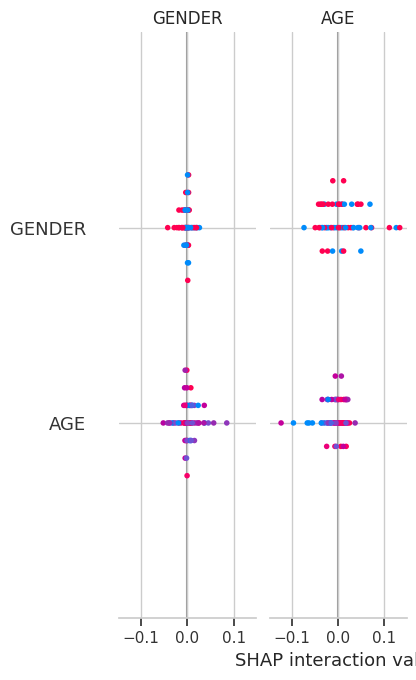

In [23]:
import shap

# Tree-based model example
best_model = RandomForestClassifier().fit(X_train, y_train)

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# LIME example
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns,
    class_names=["No Cancer","Cancer"],
    mode="classification"
)

i = 5  # Example instance
exp = explainer.explain_instance(X_test[i], best_model.predict_proba)
exp.show_in_notebook(show_table=True)
